# Training 

## Goal: To train on all Free Practice sessions. First by Extracting all non-nessesary features (noise) and cleaning data preping all Free Practice sessions. Once Cleaned, using Random Forest to train the free practice sessions and recieve a predicted Lap time for Qualification. Then compare the Actual vs Predicted lap times

In [129]:
import fastf1
import pandas as pd
from data import freePracticeDF, qualiLapsDF
from sklearn.model_selection import train_test_split


fp_all = freePracticeDF(2025, "Australia")
quali = qualiLapsDF(2025, "Australia")

print(fp_all)
print(quali)

core           INFO 	Loading data for Australian Grand Prix - Practice 1 [v3.8.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '4', '5', '6', '7', '10', '12', '14', '16', '18', '22', '23', '27', '30', '31', '44', '55', '63', '81', '87']
core           INFO 	Loading data for Australian Grand Prix - Practice 2 [v3.8.1]
req            INFO 	Usin

     Driver  SpeedI1  SpeedI2  SpeedFL  SpeedST Compound  TyreLife  FreshTyre  \
1       VER    282.0    321.0    304.0    320.0   MEDIUM       2.0       True   
2       VER    149.0    147.0    306.0    227.0   MEDIUM       3.0       True   
3       VER    285.0    326.0    310.0    326.0   MEDIUM       4.0       True   
4       VER    121.0    129.0    304.0    231.0   MEDIUM       5.0       True   
5       VER    284.0    322.0    307.0    324.0   MEDIUM       6.0       True   
...     ...      ...      ...      ...      ...      ...       ...        ...   
1315    PIA    288.0    319.0    309.0    321.0     SOFT       2.0       True   
1316    PIA    196.0    223.0    145.0    256.0     SOFT       3.0       True   
1317    PIA    162.0    192.0    308.0    152.0     SOFT       4.0       True   
1318    PIA    288.0    321.0    307.0    324.0     SOFT       5.0       True   
1321    PIA    235.0    237.0      4.0    255.0     SOFT       8.0      False   

                 Team Track

/Users/joseescobar/Documents/Personal Projects/f1-lap-prediction-ml/src/features.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qualiLaps["LapTimeSeconds"] = qualiLaps["LapTime"].dt.total_seconds()
/Users/joseescobar/Documents/Personal Projects/f1-lap-prediction-ml/src/features.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qualiLaps["Sector1TimeSeconds"] = qualiLaps["Sector1Time"].dt.total_seconds()
/Users/joseescobar/Documents/Personal Projects/f1-lap-prediction-ml/src/features.py:66: SettingW

In [130]:
fp_all

,Driver,SpeedI1,SpeedI2,SpeedFL,SpeedST,Compound,TyreLife,FreshTyre,Team,TrackStatus,LapTimeSeconds,Sector1TimeSeconds,Sector2TimeSeconds,Sector3TimeSeconds
1,VER,282.0,321.0,304.0,320.0,MEDIUM,2.0,True,Red Bull Racing,1,79.771,27.951,17.793,34.027
2,VER,149.0,147.0,306.0,227.0,MEDIUM,3.0,True,Red Bull Racing,1,143.915,49.204,37.267,57.444
3,VER,285.0,326.0,310.0,326.0,MEDIUM,4.0,True,Red Bull Racing,1,79.149,27.343,17.455,34.351
4,VER,121.0,129.0,304.0,231.0,MEDIUM,5.0,True,Red Bull Racing,1,148.776,51.751,43.081,53.944
5,VER,284.0,322.0,307.0,324.0,MEDIUM,6.0,True,Red Bull Racing,1,78.325,27.206,17.528,33.591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1315,PIA,288.0,319.0,309.0,321.0,SOFT,2.0,True,McLaren,1,76.077,26.358,17.276,32.443
1316,PIA,196.0,223.0,145.0,256.0,SOFT,3.0,True,McLaren,1,116.220,41.072,25.475,49.673
1317,PIA,162.0,192.0,308.0,152.0,SOFT,4.0,True,McLaren,1,113.789,46.414,25.722,41.653
1318,PIA,288.0,321.0,307.0,324.0,SOFT,5.0,True,McLaren,1,75.921,26.425,17.200,32.296


In [131]:
quali

,Driver,SpeedI1,SpeedI2,SpeedFL,SpeedST,Compound,TyreLife,FreshTyre,Team,TrackStatus,LapTimeSeconds,Sector1TimeSeconds,Sector2TimeSeconds,Sector3TimeSeconds
1,NOR,290.0,322.0,307.0,324.0,SOFT,2.0,True,McLaren,1,76.003,26.383,17.285,32.335
4,NOR,290.0,326.0,308.0,328.0,SOFT,5.0,False,McLaren,1,75.912,26.463,17.116,32.333
9,NOR,289.0,325.0,307.0,323.0,None,2.0,True,McLaren,1,75.556,26.104,17.122,32.330
12,NOR,289.0,325.0,310.0,328.0,SOFT,5.0,False,McLaren,1,75.415,26.194,17.030,32.191
18,NOR,288.0,325.0,310.0,326.0,SOFT,2.0,True,McLaren,1,75.096,25.961,16.997,32.138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,HUL,289.0,328.0,307.0,323.0,SOFT,2.0,True,Kick Sauber,1,76.925,26.605,17.309,33.011
278,HUL,288.0,328.0,302.0,327.0,SOFT,2.0,True,Kick Sauber,1,76.579,26.656,17.201,32.722
281,LAW,291.0,329.0,307.0,327.0,SOFT,2.0,True,Red Bull Racing,1,77.094,26.819,17.362,32.913
288,OCO,288.0,323.0,303.0,315.0,SOFT,2.0,True,Haas F1 Team,1,77.517,27.066,17.337,33.114


In [132]:
fp_all= fp_all[fp_all["TrackStatus"] == "1"]
fp_all = fp_all.dropna(subset=["TrackStatus"])
fp_all = fp_all[fp_all["LapTimeSeconds"].notna()]
fp_all = fp_all[fp_all["LapTimeSeconds"] < 85]
fp_all["FreshTyre"] = fp_all["FreshTyre"].astype(int)
fp_all["DriverLabel"] = fp_all["Driver"]
fp_all = pd.get_dummies(fp_all, columns=["Compound"], drop_first=False)
fp_all = pd.get_dummies(fp_all, columns=["Driver", "Team"], drop_first=False)
 


/var/folders/3w/p67dkhvd2_x822z48p6czcj40000gn/T/ipykernel_38981/2103524127.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fp_all["FreshTyre"] = fp_all["FreshTyre"].astype(int)
/var/folders/3w/p67dkhvd2_x822z48p6czcj40000gn/T/ipykernel_38981/2103524127.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fp_all["DriverLabel"] = fp_all["Driver"]


In [133]:
fp_all

,SpeedI1,SpeedI2,SpeedFL,SpeedST,TyreLife,FreshTyre,TrackStatus,LapTimeSeconds,Sector1TimeSeconds,Sector2TimeSeconds,...,Team_Alpine,Team_Aston Martin,Team_Ferrari,Team_Haas F1 Team,Team_Kick Sauber,Team_McLaren,Team_Mercedes,Team_Racing Bulls,Team_Red Bull Racing,Team_Williams
1,282.0,321.0,304.0,320.0,2.0,1,1,79.771,27.951,17.793,...,False,False,False,False,False,False,False,False,True,False
3,285.0,326.0,310.0,326.0,4.0,1,1,79.149,27.343,17.455,...,False,False,False,False,False,False,False,False,True,False
5,284.0,322.0,307.0,324.0,6.0,1,1,78.325,27.206,17.528,...,False,False,False,False,False,False,False,False,True,False
13,271.0,294.0,286.0,286.0,9.0,0,1,83.242,28.907,18.449,...,False,False,False,False,False,False,False,False,True,False
14,267.0,289.0,287.0,287.0,10.0,0,1,83.347,28.947,18.373,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1302,289.0,320.0,309.0,327.0,5.0,0,1,75.960,26.277,17.173,...,False,False,False,False,False,False,True,False,False,False
1309,285.0,314.0,305.0,320.0,2.0,1,1,77.298,26.971,17.515,...,False,False,False,False,False,True,False,False,False,False
1312,284.0,312.0,307.0,322.0,5.0,1,1,76.884,26.703,17.467,...,False,False,False,False,False,True,False,False,False,False
1315,288.0,319.0,309.0,321.0,2.0,1,1,76.077,26.358,17.276,...,False,False,False,False,False,True,False,False,False,False


In [134]:
feature_col = fp_all.columns.to_list()
feature_col.remove("LapTimeSeconds")
feature_col.remove("DriverLabel")


X = fp_all[feature_col]
y = fp_all["LapTimeSeconds"]

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42)

In [136]:
from sklearn.ensemble import RandomForestRegressor

randomForest = RandomForestRegressor(n_estimators=300, max_depth=5, min_samples_leaf=3,random_state=42)

randomForest.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",300
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",5
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",3
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples a

In [137]:
y_pred = randomForest.predict(X_test)
y_pred

array([82.66155701, 76.3283275 , 76.83376795, 82.54468984, 78.2190576 ,
       82.25074801, 82.72354273, 76.18931907, 82.37547992, 83.21315151,
       76.25705003, 78.18380597, 82.80829041, 82.63963715, 78.32978641,
       82.20296387, 78.1281197 , 80.91296205, 77.78065843, 80.17508113,
       83.26524985, 82.7597069 , 82.61863943, 82.72853959, 79.22314326,
       82.6306064 , 84.40380802, 77.51523265, 82.64384958, 76.99088817,
       77.23072721, 83.21156305, 83.26894455, 78.86165044, 79.82554965,
       82.22478043, 76.84396411, 84.24720833, 79.17908379, 83.74384012,
       82.46156469, 77.51809444, 81.6345088 , 82.2744764 , 82.03534019,
       82.49341239, 78.05111041, 76.21044799, 82.07674745, 77.1111696 ,
       77.8469869 , 81.96434156, 76.4392797 , 78.04446735, 77.32349881,
       77.62885673, 78.3955904 , 82.50287062, 83.06230079, 77.82268729,
       82.51828261, 79.7859754 , 82.08419986, 81.54141794, 77.80137418,
       81.98535769, 79.30613884, 77.06922751, 78.29599639, 79.88

In [138]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np


mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("MAE (sec):", mae)
print("RMSE (sec):", rmse)

MAE (sec): 0.18453216980899503
RMSE (sec): 0.382986372033901


In [139]:
fp_all["PredLap"] = randomForest.predict(fp_all[feature_col])
fp_all

,SpeedI1,SpeedI2,SpeedFL,SpeedST,TyreLife,FreshTyre,TrackStatus,LapTimeSeconds,Sector1TimeSeconds,Sector2TimeSeconds,...,Team_Aston Martin,Team_Ferrari,Team_Haas F1 Team,Team_Kick Sauber,Team_McLaren,Team_Mercedes,Team_Racing Bulls,Team_Red Bull Racing,Team_Williams,PredLap
1,282.0,321.0,304.0,320.0,2.0,1,1,79.771,27.951,17.793,...,False,False,False,False,False,False,False,True,False,79.888661
3,285.0,326.0,310.0,326.0,4.0,1,1,79.149,27.343,17.455,...,False,False,False,False,False,False,False,True,False,79.499027
5,284.0,322.0,307.0,324.0,6.0,1,1,78.325,27.206,17.528,...,False,False,False,False,False,False,False,True,False,78.395590
13,271.0,294.0,286.0,286.0,9.0,0,1,83.242,28.907,18.449,...,False,False,False,False,False,False,False,True,False,83.217798
14,267.0,289.0,287.0,287.0,10.0,0,1,83.347,28.947,18.373,...,False,False,False,False,False,False,False,True,False,83.249657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1302,289.0,320.0,309.0,327.0,5.0,0,1,75.960,26.277,17.173,...,False,False,False,False,False,True,False,False,False,76.189319
1309,285.0,314.0,305.0,320.0,2.0,1,1,77.298,26.971,17.515,...,False,False,False,False,True,False,False,False,False,77.366791
1312,284.0,312.0,307.0,322.0,5.0,1,1,76.884,26.703,17.467,...,False,False,False,False,True,False,False,False,False,76.839665
1315,288.0,319.0,309.0,321.0,2.0,1,1,76.077,26.358,17.276,...,False,False,False,False,True,False,False,False,False,76.159337


In [140]:
pred_quali = (
    fp_all
    .groupby("DriverLabel")["PredLap"]
    .nsmallest(3)
    .groupby(level=0)
    .mean()
    .reset_index()
)
pred_quali = pred_quali.sort_values("PredLap").reset_index(drop=True)
pred_quali["PredictedPosition"] = pred_quali.index + 1
pred_quali = pred_quali[["PredictedPosition", "DriverLabel", "PredLap"]]
pred_quali

,PredictedPosition,DriverLabel,PredLap
0,1,RUS,76.263239
1,2,PIA,76.271842
2,3,LEC,76.285292
3,4,ANT,76.426921
4,5,ALB,76.519912
5,6,SAI,76.525572
6,7,HAM,76.618857
7,8,NOR,76.771879
8,9,TSU,76.800041
9,10,VER,76.831118


In [141]:
real_quali = (
    quali
    .groupby("Driver")["LapTimeSeconds"]
    .min()
    .reset_index()
)
real_quali = real_quali.sort_values("LapTimeSeconds").reset_index(drop=True)
real_quali["RealPosition"] = real_quali.index + 1
real_quali = real_quali[["RealPosition", "Driver", "LapTimeSeconds"]]


In [142]:
compare = pd.merge(pred_quali, real_quali, left_on="DriverLabel", right_on="Driver", how="inner")
compare = compare.drop(columns=["DriverLabel"])
compare[["Driver","PredictedPosition", "RealPosition","PredLap", "LapTimeSeconds"]]
compare["NetPosChange"] = compare["PredictedPosition"] - compare["RealPosition"]
compare["LapDiff"] = compare["PredLap"] - compare["LapTimeSeconds"]
compare[["Driver","PredictedPosition", "RealPosition","NetPosChange", "PredLap", "LapTimeSeconds", "LapDiff"]]
compare = compare[["Driver","PredictedPosition", "RealPosition","NetPosChange", "PredLap", "LapTimeSeconds", "LapDiff"]]
compare

,Driver,PredictedPosition,RealPosition,NetPosChange,PredLap,LapTimeSeconds,LapDiff
0,RUS,1,4,-3,76.263239,75.546,0.717239
1,PIA,2,2,0,76.271842,75.180,1.091842
2,LEC,3,7,-4,76.285292,75.755,0.530292
3,ANT,4,16,-12,76.426921,76.525,-0.098079
4,ALB,5,6,-1,76.519912,75.737,0.782912
5,SAI,6,9,-3,76.525572,75.931,0.594572
6,HAM,7,8,-1,76.618857,75.919,0.699857
7,NOR,8,1,7,76.771879,75.096,1.675879
8,TSU,9,5,4,76.800041,75.670,1.130041
9,VER,10,3,7,76.831118,75.481,1.350118


In [143]:
compare["LapDiff"].std()


np.float64(0.3703021484565639)

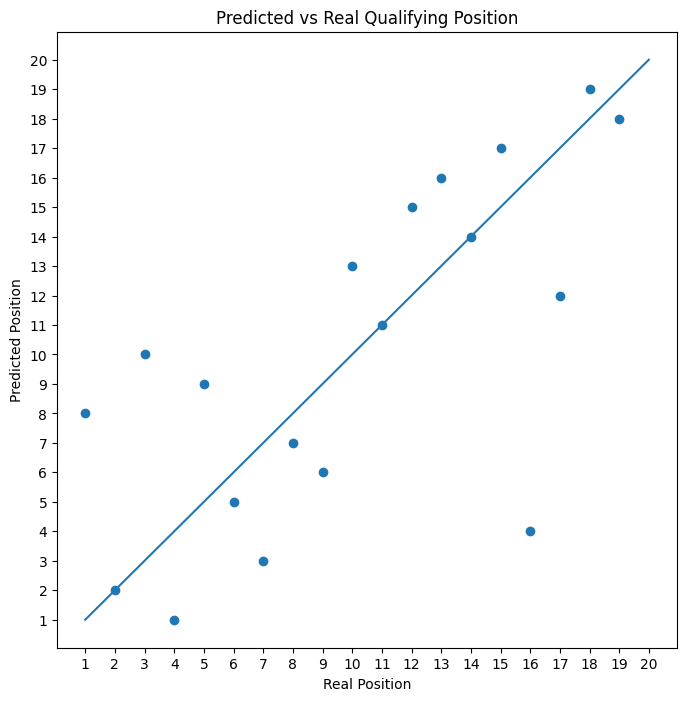

In [144]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))
plt.scatter(compare["RealPosition"], compare["PredictedPosition"])

plt.plot([1,20],[1,20])  # perfect prediction line

plt.xlabel("Real Position")
plt.ylabel("Predicted Position")
plt.title("Predicted vs Real Qualifying Position")

plt.xticks(range(1,21))
plt.yticks(range(1,21))

plt.show()


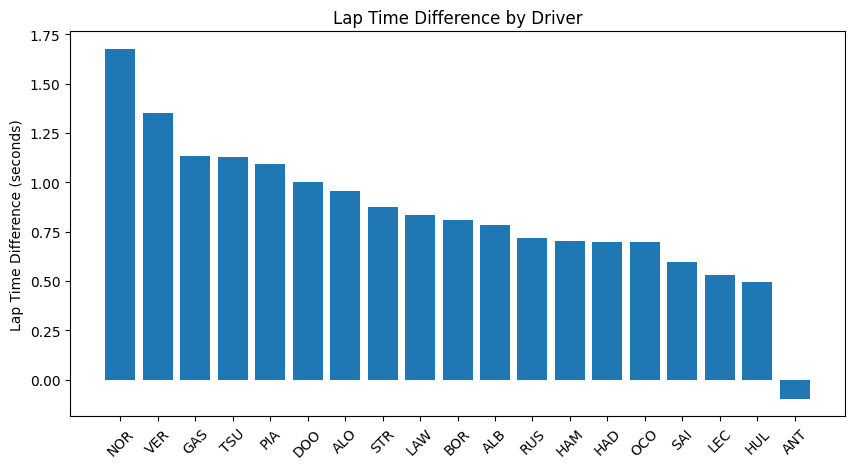

In [145]:
compare_sorted = compare.sort_values("LapDiff", ascending=False)

plt.figure(figsize=(10,5))
plt.bar(compare_sorted["Driver"], compare_sorted["LapDiff"])

plt.xticks(rotation=45)
plt.title("Lap Time Difference by Driver")
plt.ylabel("Lap Time Difference (seconds)")
plt.show()


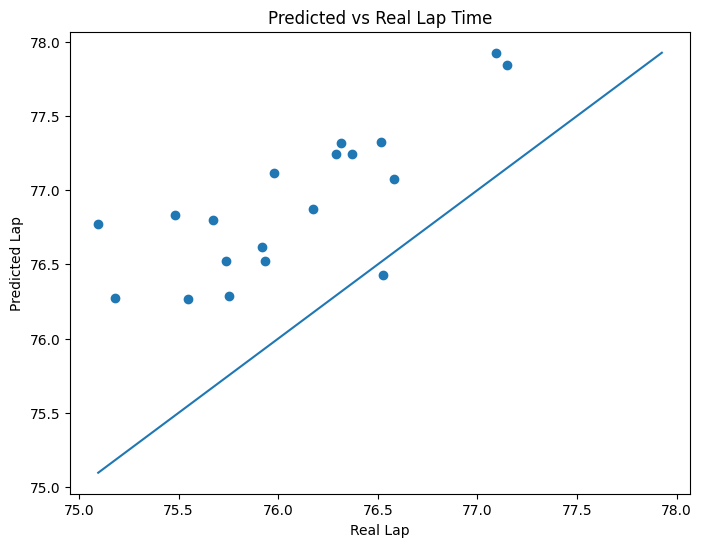

In [146]:
plt.figure(figsize=(8,6))
plt.scatter(compare["LapTimeSeconds"], compare["PredLap"])

min_v = min(compare["LapTimeSeconds"].min(), compare["PredLap"].min())
max_v = max(compare["LapTimeSeconds"].max(), compare["PredLap"].max())

plt.plot([min_v,max_v],[min_v,max_v])

plt.xlabel("Real Lap")
plt.ylabel("Predicted Lap")
plt.title("Predicted vs Real Lap Time")

plt.show()


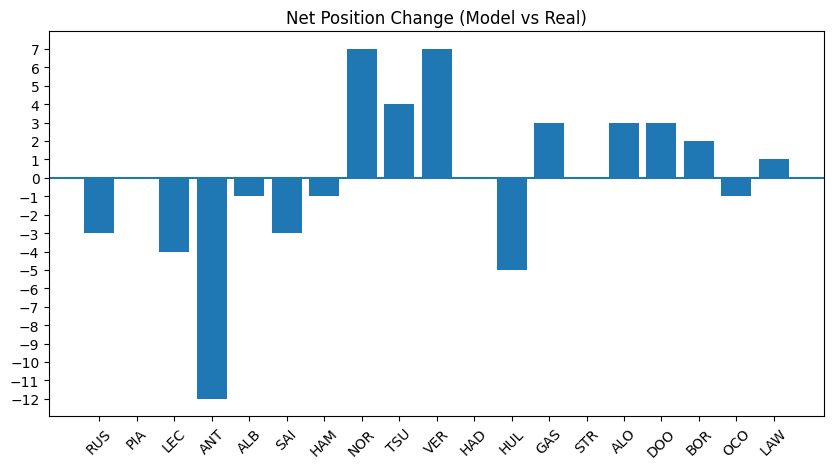

In [147]:
plt.figure(figsize=(10,5))
plt.bar(compare["Driver"], compare["NetPosChange"])

plt.axhline(0)
plt.yticks(range(int(compare["NetPosChange"].min()), int(compare["NetPosChange"].max()) + 1))

plt.xticks(rotation=45)
plt.title("Net Position Change (Model vs Real)")
plt.show()


### Overall We can see that there is a trend of cars being in relative posistion to there respected "rank", we can see top drivers & teams generally have been predicted to qualify better, while midfield drivers & teams are predicted to qualify in the middle of the pack, while lower drivers & teams qualify toward the backend. The average lap bias is about +0.84 seconds per lap, this is usual due to cars having lower fuel loads and inconsistant tire wear/life during qualification laps.